In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_excel('./cornora_us.xlsx')
df.set_index('date')
df


,date,positive
0,20200122,2
1,20200123,2
2,20200124,2
3,20200125,2
4,20200126,2
...,...,...
158,20200628,2541107
159,20200629,2580282
160,20200630,2627744
161,20200701,2678418


In [3]:
df2 = pd.read_excel('./lose.xlsx')

df2

,date,rate
0,2020-01-10,0.035
1,2020-02-07,0.036
2,2020-03-06,0.035
3,2020-04-03,0.044
4,2020-05-08,0.147
5,2020-06-05,0.133
6,2020-07-02,0.111


In [4]:
df2.set_index('date')

,rate
date,
2020-01-10,0.035
2020-02-07,0.036
2020-03-06,0.035
2020-04-03,0.044
2020-05-08,0.147
2020-06-05,0.133
2020-07-02,0.111


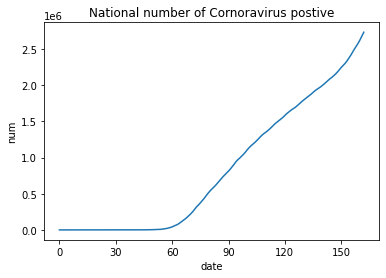

In [5]:
df['positive'].plot(xticks=([0,30,60,90,120,150]))
plt.title('National number of Cornoravirus postive')
plt.xlabel("date")
plt.ylabel("num")
plt.show()

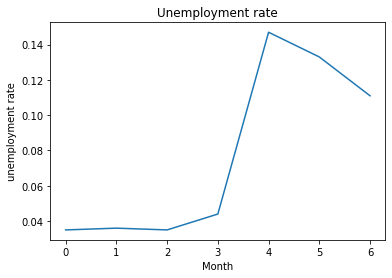

In [6]:
df2['rate'].plot()
plt.title('Unemployment rate')
plt.xlabel("Month")
plt.ylabel("unemployment rate")
plt.show()

In [7]:
import getstock as gs
apikey = "X3HKIYQHDXGGA6MG"

ModuleNotFoundError: ignored

In [ ]:
spy = gs.getDailyStockPrices("SPY",apikey)
spy

In [ ]:
spy_20=spy.loc['2020']
spy_20

In [ ]:
spy_20['close'].plot()
plt.title('S&p 500 close value in 2020')
plt.xlabel("date")
plt.ylabel("close value")
plt.show()

In [ ]:
spy_20.to_csv('./spy20.csv',columns=['adjusted_close'],index=True,sep=',')

In [8]:
fin = pd.read_excel('./spyy.xlsx')
fin

,date,adjusted_close,cor,Lncor,corsquare
0,2020-01-22,327.8656,2,0.693147,4
1,2020-01-23,328.2417,2,0.693147,4
2,2020-01-24,325.3226,2,0.693147,4
3,2020-01-27,320.1079,2,0.693147,4
4,2020-01-28,323.4623,2,0.693147,4
...,...,...,...,...,...
66,2020-04-27,285.7850,994026,13.809519,988087688676
67,2020-04-28,284.4708,1019245,13.834573,1038860370025
68,2020-04-29,291.9178,1045835,13.860326,1093770847225
69,2020-04-30,289.1999,1075454,13.888253,1156601306116


In [9]:
fin.set_index('date')

,adjusted_close,cor,Lncor,corsquare
date,,,,
2020-01-22,327.8656,2,0.693147,4
2020-01-23,328.2417,2,0.693147,4
2020-01-24,325.3226,2,0.693147,4
2020-01-27,320.1079,2,0.693147,4
2020-01-28,323.4623,2,0.693147,4
...,...,...,...,...
2020-04-27,285.7850,994026,13.809519,988087688676
2020-04-28,284.4708,1019245,13.834573,1038860370025
2020-04-29,291.9178,1045835,13.860326,1093770847225


In [10]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

results = smf.ols('adjusted_close ~ cor', data=fin).fit()

In [11]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         adjusted_close   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     4.457
Date:                Mon, 16 Jan 2023   Prob (F-statistic):             0.0384
Time:                        20:27:38   Log-Likelihood:                -345.21
No. Observations:                  71   AIC:                             694.4
Df Residuals:                      69   BIC:                             698.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    294.7625      4.490     65.643      0.0

In [12]:
results2 = smf.ols('adjusted_close ~ cor-1', data=fin).fit()

In [13]:
print(results2.summary())

                                 OLS Regression Results                                
Dep. Variable:         adjusted_close   R-squared (uncentered):                   0.269
Model:                            OLS   Adj. R-squared (uncentered):              0.258
Method:                 Least Squares   F-statistic:                              25.70
Date:                Mon, 16 Jan 2023   Prob (F-statistic):                    3.12e-06
Time:                        20:27:38   Log-Likelihood:                         -492.54
No. Observations:                  71   AIC:                                      987.1
Df Residuals:                      70   BIC:                                      989.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [14]:
results3 = smf.ols('adjusted_close ~ Lncor', data=fin).fit()

In [15]:
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:         adjusted_close   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     95.77
Date:                Mon, 16 Jan 2023   Prob (F-statistic):           1.13e-14
Time:                        20:27:39   Log-Likelihood:                -316.53
No. Observations:                  71   AIC:                             637.1
Df Residuals:                      69   BIC:                             641.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    332.0284      5.012     66.246      0.0

In [16]:
results4 = smf.ols('adjusted_close ~ Lncor-1', data=fin).fit()

In [17]:
print(results4.summary())

                                 OLS Regression Results                                
Dep. Variable:         adjusted_close   R-squared (uncentered):                   0.668
Model:                            OLS   Adj. R-squared (uncentered):              0.663
Method:                 Least Squares   F-statistic:                              140.8
Date:                Mon, 16 Jan 2023   Prob (F-statistic):                    2.01e-18
Time:                        20:27:39   Log-Likelihood:                         -464.50
No. Observations:                  71   AIC:                                      931.0
Df Residuals:                      70   BIC:                                      933.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------